Import the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [2]:
print("Loading data from 'co2.csv'....")
try:
    df = pd.read_csv("co2.csv")
    print("Data loaded successfully")
    print("First 5 rows of the dataset")
    print(df.head().to_string())
except FileNotFoundError:
    print("Error: The file 'co2.csv' was not found. Please ensure it is in the same directory.")
    exit()

Loading data from 'co2.csv'....
Data loaded successfully
First 5 rows of the dataset
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)
0  ACURA         ILX       COMPACT             2.0          4          AS5         Z                               9.9                              6.7                               8.5                           33                  196
1  ACURA         ILX       COMPACT             2.4          4           M6         Z                              11.2                              7.7                               9.6                           29                  221
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7         Z                               6.0                              5.8                               5.9                      

Data Preprocessing and Feature Engineering

In [3]:
# We select our single feature (independent variable) and the target (dependent variable)

# Check for missing values
df_missing = df.isnull().sum()
print("Missing values")
print(df_missing)

# Check for duplicates
df_duplicates = df.duplicated().sum()
print("Duplicated values")
print(df_duplicates)

# Drop duplicate values
df = df.drop_duplicates()
df_duplicates = df.duplicated().sum()
print("Duplicates after droping")
print(df_duplicates)

# Define the features (X) and target (y). Note the column names from the CSV
# We reshape the feature to a 2D array, which is a requirement for sckit learn.
X = df[["Engine Size(L)"]].values # Independent variable (feature)
y = df[["CO2 Emissions(g/km)"]].values # Dependent variable (target)

print("Shape of features (X)",X.shape)
print("Shape of target (y)",y.shape)

Missing values
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
Duplicated values
1103
Duplicates after droping
0
Shape of features (X) (6282, 1)
Shape of target (y) (6282, 1)


Data Splitting

In [4]:
# We split the data into training set and a testing set
# The model learns from the training data and is then evaluated on the testing data
# which it has never seen before. We'll use a 70/30 split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print("Number of sample in the training set",len(X_train))
print("Number of samples in the testing set",len(X_test))

Number of sample in the training set 4397
Number of samples in the testing set 1885


Visualization before training

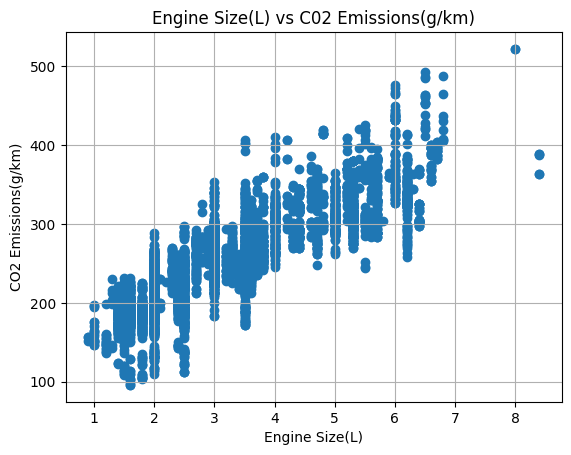

In [5]:
plt.scatter(X,y)
plt.title("Engine Size(L) vs C02 Emissions(g/km)")
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.grid()
plt.show()

Model Training

In [6]:
# We create an instance of the Linear Regression model and train it using the 
# training data. The "fit" method finds the best-fit line that represents the 
# relationship between the two variable

print("Training the Linear Regression.......")
model = LinearRegression()
model.fit(X_train,y_train)
print("Model training complete!")

Training the Linear Regression.......
Model training complete!


Model Evaluation

In [7]:
# MSE measures the average squared difference predictions and actual values
# R-squared measures the proportion of variance in the target that is predictable from the features

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE):{mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE):959.85
R-squared: 0.73


Visualization of Results

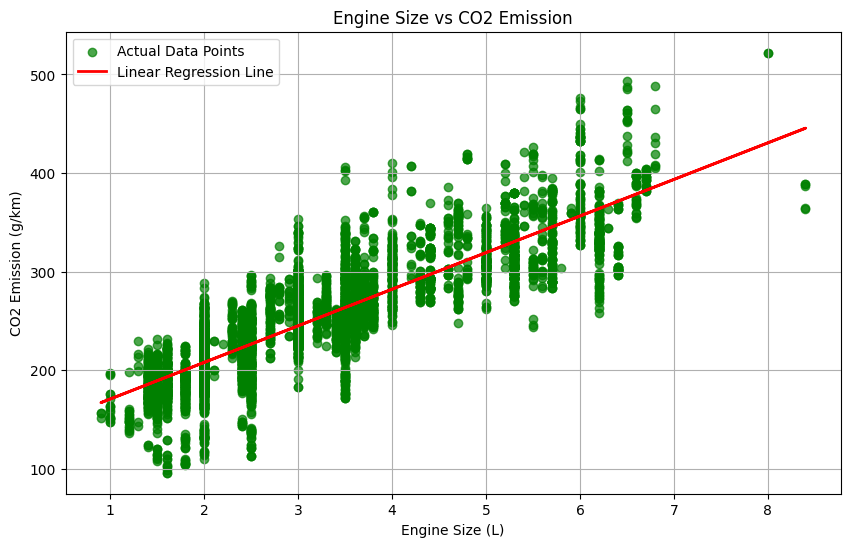

In [8]:
# A scatter plot is an excellent way to visualize the relationship and the model's
# fit. We'll plot the actual data points and the best fit regression line

plt.figure(figsize=(10,6))
plt.scatter(X,y,color="green",alpha=0.7,label="Actual Data Points")
plt.plot(X,model.predict(X),color="red",linewidth=2,label="Linear Regression Line")
plt.title("Engine Size vs CO2 Emission")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emission (g/km)")
plt.legend()
plt.grid()
plt.show()

Makking a New Prediction

In [ ]:
try:
    engine_size = float(input("Enter Engine Size (L) for prediction: "))
    new_X = np.array([[engine_size]])
    predicted_emission = model.predict(new_X)
    print(f"Predicted CO2 Emission (g/km) for Engine Size {engine_size}L: {predicted_emission[0][0]:.2f}")
except ValueError:
    print("Invalid input. Please enter a numeric value.")

Predicted CO2 Emission (g/km) for Engine Size 3.0L: 245.02
